In [1]:
import ROOT as r
import copy
r.gStyle.SetPalette(1)
r.gStyle.SetOptStat(1)

Welcome to ROOTaaS 6.06/06


In [7]:
fgood=r.TFile('root_files/KA0193_190703_SPE.root')
tgood=fgood.Get('event')

fbad=r.TFile('root_files/KA0192_190708_SPE.root')
tbad=fbad.Get('event')

tgood.Print()

******************************************************************************
*Tree    :event     : event                                                  *
*Entries :    50000 : Total =         6996019 bytes  File  Size =    2155288 *
*        :          : Tree compression factor =   3.25                       *
******************************************************************************
*Br    0 :nSamples  : number_of_samples/I                                    *
*Entries :    50000 : Total  Size=     201045 bytes  File Size  =       1762 *
*Baskets :        7 : Basket Size=      32000 bytes  Compression= 113.81     *
*............................................................................*
*Br    1 :dLiveTime_s : livetime/D                                           *
*Entries :    50000 : Total  Size=     401604 bytes  File Size  =     364824 *
*Baskets :       13 : Basket Size=      32000 bytes  Compression=   1.10     *
*...................................................

In [29]:
#c1 = r.TCanvas()
#f.event.Draw('event_charge')
#c1.Draw()

In [30]:
def getplot1D(t,branch, nbin, xmin, xlow):
    h=r.TH1F(branch, "", nbin, xmin, xlow)
    #mycode='h.Fill(len(t.'+branch+'))'
    mycode='h.Fill(t.'+branch+')'
    for event in t:
        exec(mycode)
    hr=copy.deepcopy(h)
    hr.Scale(1/hr.Integral())
    del h
    return hr

In [31]:
def printplot1D(branch, nbin, xmin, xlow):    
    hg=getplot1D(tgood, branch, nbin, xmin, xlow)
    hb=getplot1D(tbad, branch, nbin, xmin, xlow)
    hb.SetLineColor(r.kRed)
    hg.SetLineColor(r.kBlue)
    c1=r.TCanvas()
    c1.SetLogy()
    hg.Draw()
    hb.Draw('same')
    c1.Draw()

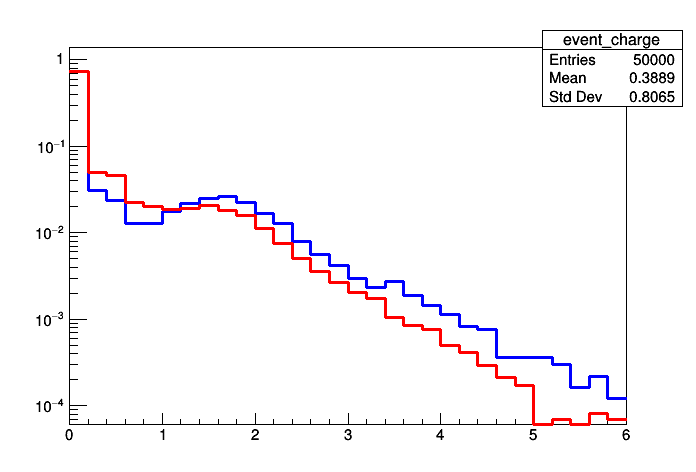

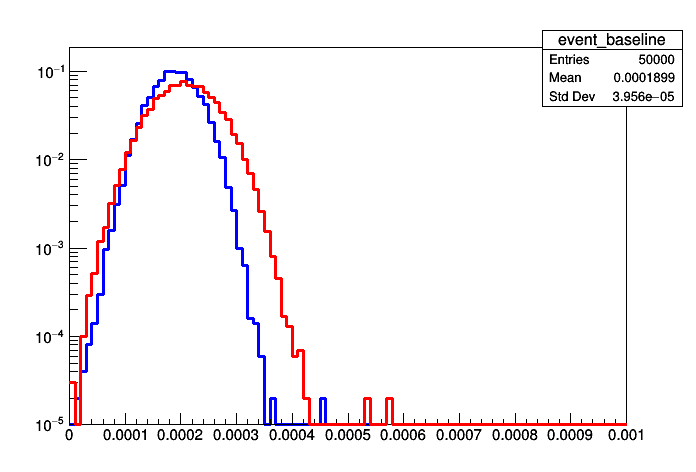

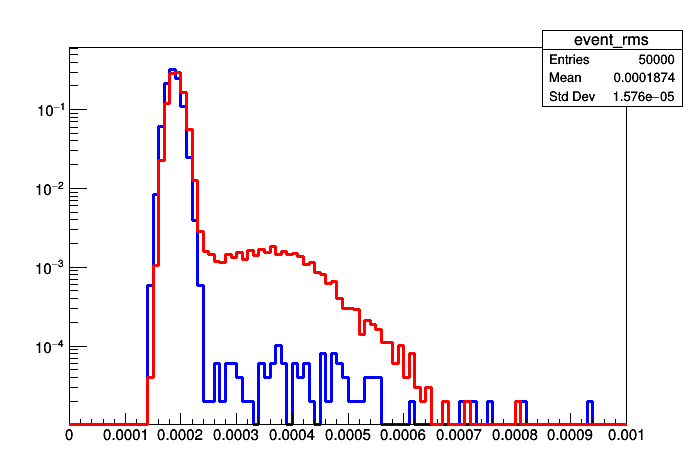

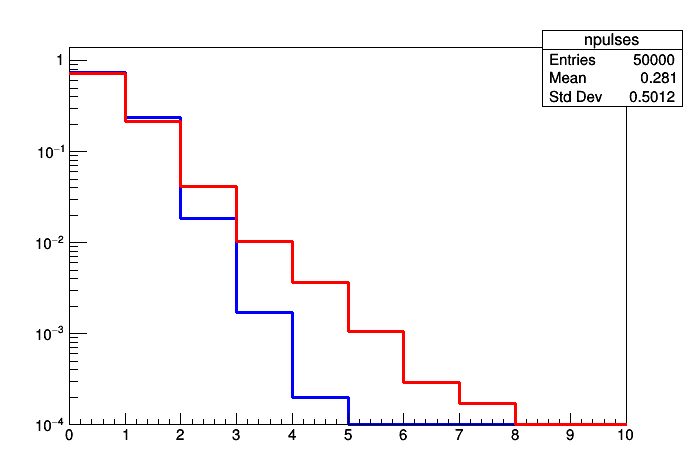

In [40]:
printplot1D('event_charge', 30, 0., 6.)
printplot1D('event_baseline', 100, 0., 0.001)
printplot1D('event_rms', 100, 0., 0.001)
#printplot1D('isgood', 100, 0., 0.001)
printplot1D('npulses', 10, 0., 10.)